Using cache found in C:\Users\rules/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-3 Python-3.10.0 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 576x768 1 bicycle, 1 car, 1 dog
Speed: 6.5ms pre-process, 62.3ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)


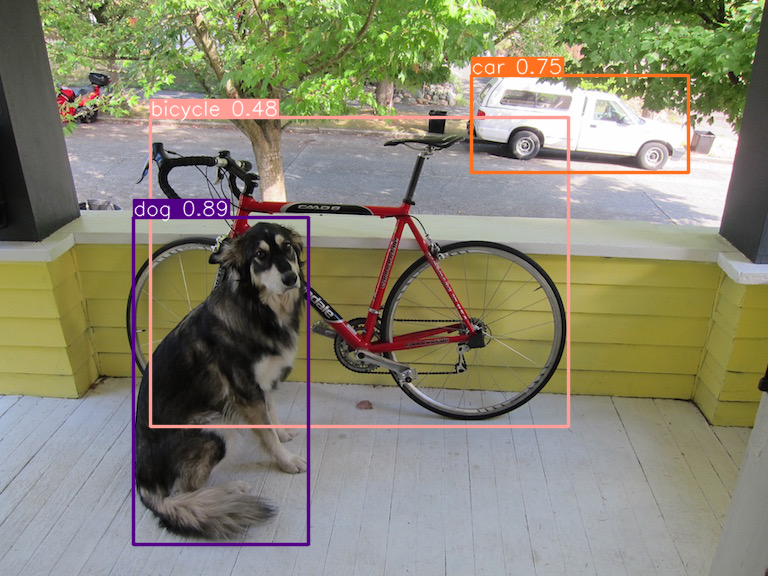

In [1]:
import torch
from PIL import Image

# YOLOv5 모델 불러오기
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# 테스트 이미지 불러오기
image = Image.open('..\\..\\data\\dog.jpg')

# 객체 검출
results = model(image)

# 결과 출력
results.print()  # 객체 검출 결과를 텍스트로 출력

# 원본 이미지 표시
image.show()

# 객체 검출 결과 이미지로 출력
results.show()



In [1]:
# 예제 16.4-1 프로그램

import numpy as np
import cv2

#  사전학습된 yolov3 가중치 및 구성 파일 읽어오기
#net = cv2.dnn.readNet("..\\..\\data\\yolov3.weights", "..\\..\\data\\yolov3.cfg")
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")


#  출력층 이름 가져오기 
output_layers = net.getUnconnectedOutLayersNames()


#  coco.names 파일에서 80개 클래스 이름 가져오기
classes = []
#with open("..\\..\\data\\coco.names", "r") as f:
with open("coco.names", "r") as f:

    # strip() 함수는 문자열 시작과 끝에 있는 공백 제거
    classes = [line.strip() for line in f.readlines()]  

# 각 클래스에 고유 컬러 할당 
colors = np.random.uniform(0, 255, size=(len(classes), 3)) 

# 출력층 경계박스 값 예측
def get_objects_predictions(img):
    height, width = img.shape[:2]
    blob = cv2.dnn.blobFromImage(img,scalefactor=1/255,size=(416,416),
                                 mean=(0,0,0),swapRB=True,crop=False)
    net.setInput(blob)
    predictions = net.forward(output_layers)
    return predictions,height,width

# boxes - coords of b-box whose max class confidence > o.5
# confidences- max class confidence of corresponding box
# class_ids - class indexes of boxes with the max class confidence
def get_box_dimensions(predictions,height,width,confThreshold=0.5):
    class_ids = []
    confidences = []
    boxes = []
    for out in predictions:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores) 
            confidence = scores[class_id]
            if confidence > confThreshold:
                center_x = int(detection[0] * width) 
                center_y = int(detection[1] * height) 
                w = int(detection[2] * width) 
                h = int(detection[3] * height) 
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    return boxes,confidences,class_ids

# ignore boxes whose class confidence is less than 0.5
# ignore boxes whose class confidence is non-maximun and 
# whose IoU with maximum class confidence box > 0.4
def non_max_suppression(boxes,confidences,confThreshold=0.5, 
                        nmsThreshold = 0.4):
    return cv2.dnn.NMSBoxes(boxes,confidences,confThreshold,
                            nmsThreshold)


# 경계박스 그리기
def draw_bounding_boxes(img,boxes,confidences,class_ids,
                        nms_indexes,colors):
    for i in range(len(boxes)):
        if i in nms_indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]]) + ' :' 
            label = label+ str(int(confidences[i]*100)) + '%'
            color = colors[i]
            cv2.rectangle(img,(x, y),(x + w, y + h),color,3)
            font = cv2.FONT_HERSHEY_PLAIN
            cv2.putText(img,label,(x, y - 15),font,
                        2, (0,0,0), 3)
    return img

# perform object detection calling related functions
def detect_objects(image):

    predictions,height, width = get_objects_predictions(image)     
    boxes,confidences,class_ids = get_box_dimensions(predictions,
                                                     height, width)   
    nms_indexes = non_max_suppression(boxes,confidences)
    outImage = draw_bounding_boxes(image,boxes,confidences,class_ids,
                                   nms_indexes,colors)
    return outImage


# 테스트 영상 읽어오기
image = cv2.imread('..\\..\\data\\dog.jpg')
cv2.imshow("input-image" , image)

# 객체 검출
outImage = detect_objects(image)
cv2.imshow('detected objects',outImage)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_io.cpp:660: error: (-215:Assertion failed) separator_index < line.size() in function 'cv::dnn::darknet::ReadDarknetFromCfgStream'


`net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")`

위의 코드는 OpenCV 라이브러리를 사용하여 YOLOv3 모델을 로드하는 코드입니다. YOLO (You Only Look Once)는 객체 감지 작업에 사용되는 딥러닝 모델 중 하나로, 이미지나 비디오에서 다양한 객체를 식별하는 데 사용됩니다. 이 코드를 통해 YOLOv3 모델을 초기화하고 사용할 수 있게 됩니다.

여기에서 코드를 구성하는 두 가지 주요 파일은 다음과 같습니다:

1. "yolov3.weights": 이 파일은 YOLOv3 모델의 사전 훈련된 가중치 파일을 나타냅니다. 가중치는 모델이 이미지에서 객체를 인식하는 데 필요한 매개변수입니다.

2. "yolov3.cfg": 이 파일은 YOLOv3 모델의 아키텍처를 정의하는 구성 파일입니다. 이 파일은 모델의 레이어 구성, 크기, 하이퍼파라미터 등을 정의합니다.

"cv2.dnn.readNet" 함수를 사용하여 이 두 파일을 읽고 모델을 초기화합니다. 이후로, 초기화된 모델을 사용하여 이미지나 비디오에서 객체 감지를 수행할 수 있습니다. YOLOv3 모델은 실시간 객체 감지에 매우 효과적이며, 다양한 응용 프로그램에 사용됩니다.

이 코드를 실행하기 전에 필요한 라이브러리를 설치하고 "yolov3.weights"와 "yolov3.cfg" 파일을 다운로드하거나 준비해야 합니다.